In [112]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport


In [113]:
# load the dataset
df = pd.read_csv("Financial_inclusion_dataset.csv")
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [115]:
# profile report
profile = ProfileReport(df, title="Financial Inclusion In Africa")
profile.to_file("financial_inclusion.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [116]:
# handle null values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

- The dataset contains no null values.

In [117]:
# handle duplicates
df.duplicated().sum()

np.int64(0)

- The dataset contains no duplicates

In [118]:
# unique values in country column
df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [119]:
# distribution of countries in the dataset
df['country'].value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

bank_account    No   Yes
country                 
Kenya         4547  1521
Rwanda        7732  1003
Tanzania      6013   607
Uganda        1920   181


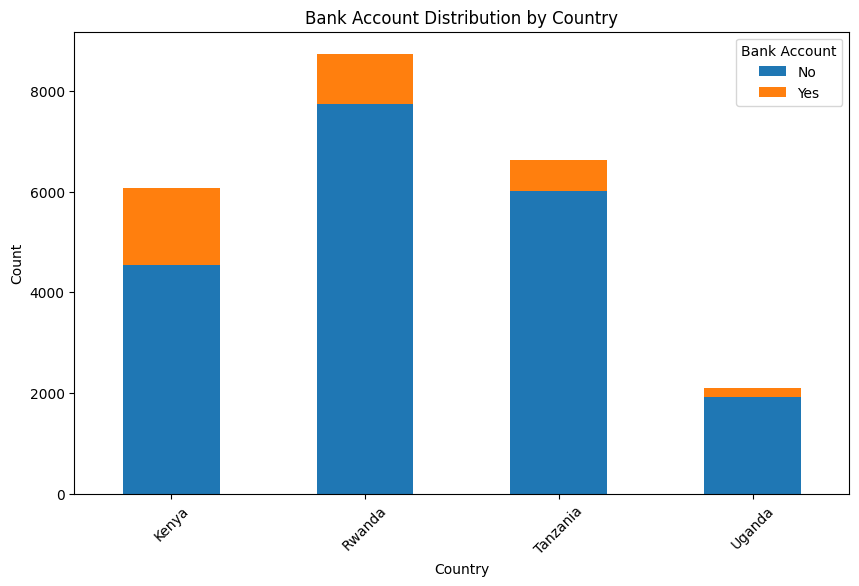

In [120]:
# plot of bank account distribution by country
# Cross-tabulation
ct = pd.crosstab(df['country'], df['bank_account'])
print(ct)

# Plot
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Bank Account Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Bank Account', labels=['No', 'Yes'])
plt.show()

- Rwanda has the highest number of recorded bank accounts. Uganda carries the lowest number of bank accounts with an underrepresentation of 2101 as compared to the other three countries.
- This imbalance could introduce model bias.

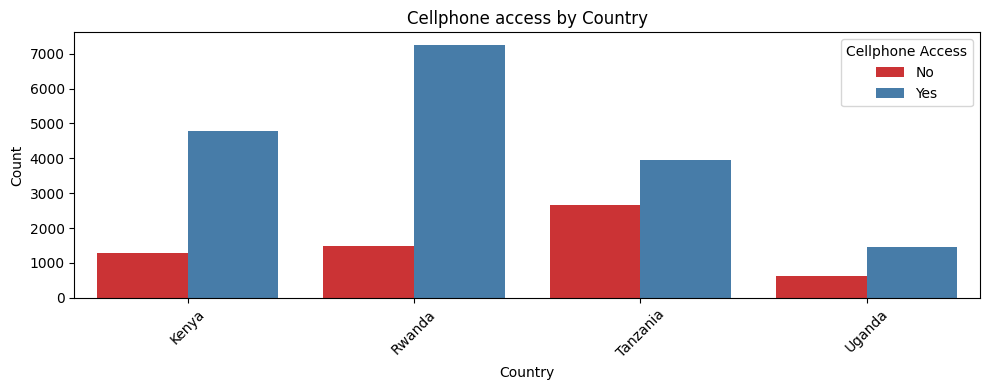

In [121]:
#cellphone access by country
data = df.groupby(['country', 'cellphone_access']).size().reset_index(name='count')

# Create the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='country', y='count', hue='cellphone_access', data=data, palette='Set1')

# Customize the plot
plt.title('Cellphone access by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cellphone Access')
plt.tight_layout()

# Show the plot
plt.show()

Bank Account Distribution by Year:
bank_account    No   Yes
year                    
2016          7732  1003
2017          6013   607
2018          6467  1702


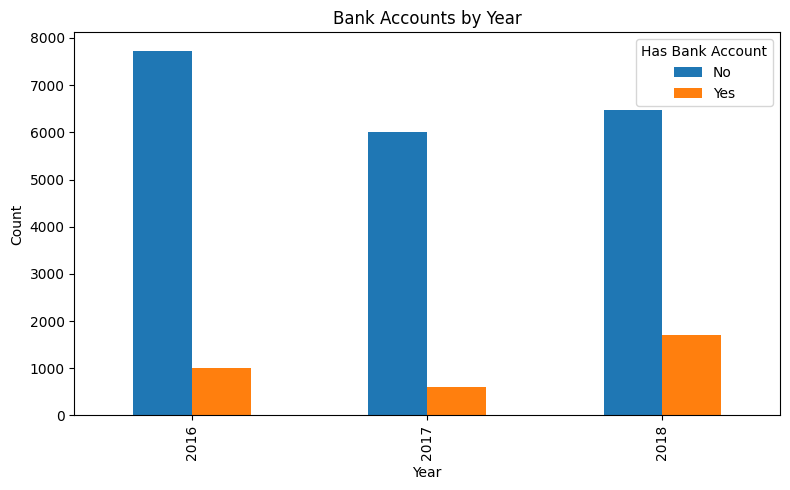

In [122]:
# Count bank accounts by year
# Create cross-tabulation
cross_tab = pd.crosstab(df['year'], df['bank_account'])

# Display the table
print("Bank Account Distribution by Year:")
print(cross_tab)

counts = df.groupby(['year', 'bank_account']).size().unstack()

# Create basic plot
counts.plot(kind='bar', figsize=(8,5))

# Add labels
plt.title("Bank Accounts by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Has Bank Account")

# Show plot
plt.tight_layout()
plt.show()

- Over the years there is an increase in the number of people who have a bank account. However, the count of individuals without is still relatively high.

Bank Account Distribution by Location:
bank_account      No   Yes
location_type             
Rural          12672  1671
Urban           7540  1641


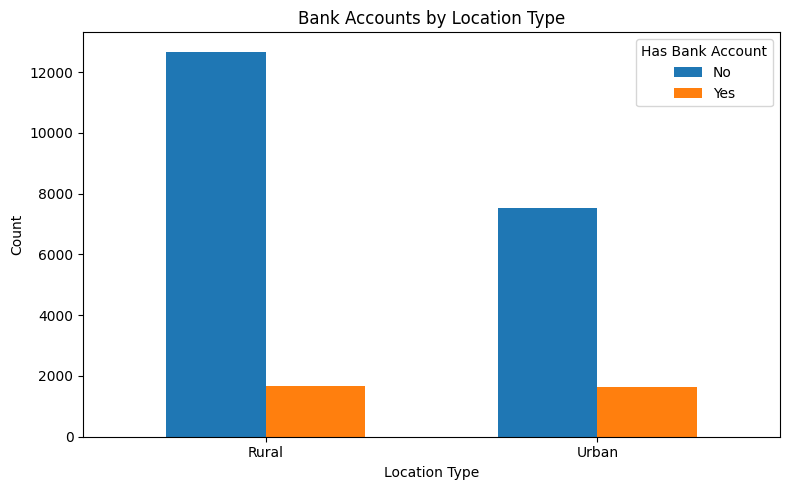

In [123]:
# location vs bank account
location_crosstab = pd.crosstab(df['location_type'], df['bank_account'])
print("Bank Account Distribution by Location:")
print(location_crosstab)

# 
location_crosstab.plot(kind='bar', 
                      figsize=(8, 5),
                      width=0.6)

plt.title("Bank Accounts by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.legend(title="Has Bank Account")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [124]:
# handle outliers
# Define numerical columns with their minimum allowed values
num_cols = {
    'age_of_respondent': 18, # minimum age to have a bank account
    'household_size': 1 # minimum number of peoplr in a household
}

def clip_outliers(df):
    for col, min_val in num_cols.items():
        # Calculate IQR bounds
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds with minimum enforcement
        lower = max(Q1 - 1.5 * IQR, min_val)  # Ensures minimum value
        upper = Q3 + 1.5 * IQR
        
        # Count outliers (values outside bounds)
        n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        
        # Print stats
        print(f"\nColumn: {col}")
        print(f"Calculated lower bound: {Q1 - 1.5 * IQR:.2f}")
        print(f"Enforced lower bound: {lower:.2f}")
        print(f"Upper bound: {upper:.2f}")
        print(f"Number of outliers: {n_outliers}")
        
        # Clip values to enforced bounds
        df[col] = df[col].clip(lower=lower, upper=upper)
    
    return df

# Apply to dataframe
df = clip_outliers(df)

# Show final statistics
print("\nFinal statistics after clipping:")
print(df[list(num_cols.keys())].describe())


Column: age_of_respondent
Calculated lower bound: -8.50
Enforced lower bound: 18.00
Upper bound: 83.50
Number of outliers: 1180

Column: household_size
Calculated lower bound: -2.50
Enforced lower bound: 1.00
Upper bound: 9.50
Number of outliers: 381

Final statistics after clipping:
       age_of_respondent  household_size
count       23524.000000    23524.000000
mean           38.811788        3.770894
std            16.283876        2.138426
min            18.000000        1.000000
25%            26.000000        2.000000
50%            35.000000        3.000000
75%            49.000000        5.000000
max            83.500000        9.500000


In [125]:
df.drop(columns='uniqueid', inplace=True)

## Encoding


In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Categorical columns (bank_account is TARGET, not a feature)
categorical_cols = [
    'country',
    'location_type',
    'cellphone_access',
    'gender_of_respondent',
    'relationship_with_head',
    'marital_status',
    'education_level',
    'job_type'
]

# Binary Columns (Label Encoding) - Only features!
binary_cols = ['cellphone_access', 'gender_of_respondent']

# Store encoders for Streamlit
label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder

# Nominal Columns (OneHot Encoding)
nominal_cols = ['country', 'location_type', 'relationship_with_head', 
                'marital_status', 'job_type']

# Initialize and save OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_nominal = onehot_encoder.fit_transform(df[nominal_cols])

# Create DataFrame for encoded features
encoded_df = pd.DataFrame(
    encoded_nominal,
    columns=onehot_encoder.get_feature_names_out(nominal_cols)
)

# Drop original nominal columns and concatenate encoded ones
df = df.drop(columns=nominal_cols)
df = pd.concat([df, encoded_df], axis=1)


# Ordinal Columns (Manual Mapping for Education Level)
education_order = {
    'No formal education': 0,
    'Primary education': 1,
    'Secondary education': 2,
    'Vocational/Specialised training': 3,
    'Tertiary education': 4,
    'Other/Dont know/RTA': 0  # Handle unknowns as lowest tier
}
df['education_level'] = df['education_level'].map(education_order)


# Verify Encoding
print("\nEncoded Data Sample:")
print(df.head())

print("\nEncoded Columns:")
print(df.columns)


Encoded Data Sample:
   year bank_account  cellphone_access  household_size  age_of_respondent  \
0  2018          Yes                 1             3.0               24.0   
1  2018           No                 0             5.0               70.0   
2  2018          Yes                 1             5.0               26.0   
3  2018           No                 1             5.0               34.0   
4  2018           No                 0             8.0               26.0   

   gender_of_respondent  education_level  country_Rwanda  country_Tanzania  \
0                     0                2             0.0               0.0   
1                     0                0             0.0               0.0   
2                     1                3             0.0               0.0   
3                     0                1             0.0               0.0   
4                     1                1             0.0               0.0   

   country_Uganda  ...  marital_status_Widowed

In [127]:
# Save for Streamlit
import joblib

joblib.dump({
    'label_encoders': label_encoders,      # For binary columns
    'onehot_encoder': onehot_encoder,      # For nominal features
    'education_mapping': education_order,  # For education levels
    'feature_names': X.columns.tolist()    # For feature order validation
}, 'preprocessing_artifacts.pkl')

['preprocessing_artifacts.pkl']

## Training the model

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [129]:
# define features and target variable
X = df.drop('bank_account', axis=1)
y = df['bank_account']

In [130]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [132]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.855047821466525

In [133]:
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest Classifier and parameter distribution
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# RandomizedSearchCV for efficient hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,          # Number of parameter combinations to try
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available processors
    random_state=42
)

# Fit the model
random_search.fit(X_res, y_res)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Display the results
print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30}
Best score: 0.9110184890931462


In [134]:
random_search

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [135]:
# exporting the model

joblib.dump(random_search, "model.pkl")

['model.pkl']

In [137]:
X.columns

Index(['year', 'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'education_level', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'location_type_Urban',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'job_type_Farming and Fishing', 'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed'],
      dtype='object')